# k-nearest neighbors algorithm

## Used to classify Iris flowers and to recommend movies

The k-nearest neighbors algorithm is another type of classication that has the advantage of being able to handle data that is not linearly seperable

![knn](KNN.png)

The classification chooses the same classification of the majority of the $k$ closest neigbhors. 

In [1]:
using RDatasets     # needed for the iris Data
using Plots         # needed to plot the results
using CSV

In [2]:
# Iris dataset, with info on the dataset discussed in previous notebook
iris = dataset("datasets","iris")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [3]:
# instead of taking all of the data, take only the first 30 of each so that we have the other points that
# can be used for testing of the algorithm
# x_data contains the features of the first 30 of each species
# setup training X data
x_data1 = [x for x in zip(iris.SepalLength[1:30],    iris.SepalWidth[1:30],    iris.PetalLength[1:30])   ]
x_data2 = [x for x in zip(iris.SepalLength[51:80],   iris.SepalWidth[51:80],   iris.PetalLength[51:80])  ]
x_data3 = [x for x in zip(iris.SepalLength[101:130], iris.SepalWidth[101:130], iris.PetalLength[101:130])]
x_data =  vcat(x_data1, x_data2, x_data3)

90-element Array{Tuple{Float64,Float64,Float64},1}:
 (5.1, 3.5, 1.4)
 (4.9, 3.0, 1.4)
 (4.7, 3.2, 1.3)
 (4.6, 3.1, 1.5)
 (5.0, 3.6, 1.4)
 (5.4, 3.9, 1.7)
 (4.6, 3.4, 1.4)
 (5.0, 3.4, 1.5)
 (4.4, 2.9, 1.4)
 (4.9, 3.1, 1.5)
 (5.4, 3.7, 1.5)
 (4.8, 3.4, 1.6)
 (4.8, 3.0, 1.4)
 ⋮
 (7.7, 2.6, 6.9)
 (6.0, 2.2, 5.0)
 (6.9, 3.2, 5.7)
 (5.6, 2.8, 4.9)
 (7.7, 2.8, 6.7)
 (6.3, 2.7, 4.9)
 (6.7, 3.3, 5.7)
 (7.2, 3.2, 6.0)
 (6.2, 2.8, 4.8)
 (6.1, 3.0, 4.9)
 (6.4, 2.8, 5.6)
 (7.2, 3.0, 5.8)

In [4]:
# Create an array 
# setup training labeled data for the top 30 of each species
y_data1 = [iris.Species[i] for i = 1:30]
y_data2 = [iris.Species[i] for i = 51:80]
y_data3 = [iris.Species[i] for i = 101:130]
y_data  = vcat(y_data1, y_data2, y_data3) 

90-element CategoricalArray{String,1,UInt32}:
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 ⋮
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"

Create a 3D Scatter plot of the training data 

The three features, "Sepal Length, Sepal Width and Petal Length", each have their own axis

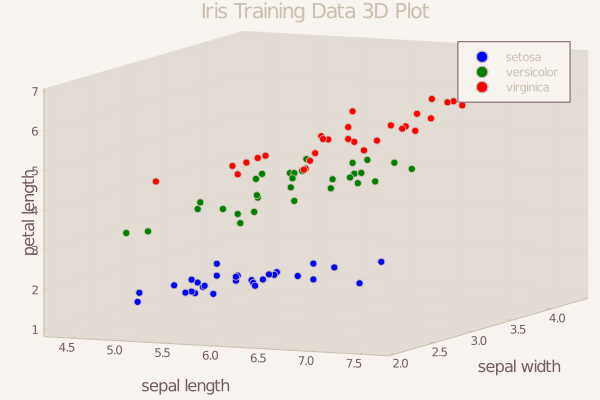

In [5]:
theme(:sand)                               # control the colors of the plot
scatter(xaxis = "sepal length",
        yaxis = "sepal width",
        zaxis = "petal length",
        title = "Iris Training Data 3D Plot")

scatter!(x_data[1:30], 
         label = "setosa",
         color = "blue")

scatter!(x_data[31:60],
          label = "versicolor",
          color = "green")

scatter!(x_data[61:90],
            label = "virginica",
            color = "red")

Implement Euclidiean distance equation using the formula:
![distance-eq](distance-eq.svg) 


![distance](distance.png) 

In [6]:
"""
    distance(p1,p1)

distance of two points in n dimensional space
# Arguments
- `p1::1d array`: n element array with coordinates of first point
- `p2::1d array`: n element array with coordinates of second point

returns
- the distance between the two points by calculating the square 
  root of the sum of the differences
"""
function distance(p1, p2)
    return sqrt(sum([(p1[i]-p2[i])^2 for i = 1:length(p1)]))
end

distance

Use the distance function to inspect calculate the distances to each element in the
feature array to the target and then return the k closest results

In [7]:
"""
    KNN(target, feature_array, label_array, k)

classifies a target based on the features and labels of its k nearest neighbors
# Arguments
- `target::1d array`: n element array with coordinates 
- `features:: array`: x data 
- `label:: array`   : y data 

returns
- the distance between the two points by calculating the square 
  root of the sum of the differences
"""
function KNN(target, feature_array, label_array, k)
    #store all the distances from the target to the features
    # for each point in the x data we calculate the distances to the target
    # we then sort the distances 
    distance_array = [(feature_array[i], label_array[i], distance(target, feature_array[i]))
        for i = 1:length(feature_array)
            if target != feature_array[i]
            ]  
    
    sort!(distance_array, by = x -> x[3]) # sort based of the 3rd entry (distance)
    
    return distance_array[1:k]            # return the top k elements in the array
end

KNN

test_point will take the index of the feature array and return the three array elements that compose the location in 3 dimensional space

We can use the output of test_point as the input target in the KNN function

In [8]:
test_point(i) = (iris.SepalLength[i], iris.SepalWidth[i], iris.PetalLength[i])
p = test_point(44)
KNN(p, x_data, y_data, 5) 

5-element Array{Tuple{Tuple{Float64,Float64,Float64},CategoricalValue{String,UInt32},Float64},1}:
 ((5.0, 3.4, 1.6), "setosa", 0.10000000000000009)
 ((5.0, 3.4, 1.5), "setosa", 0.14142135623730964)
 ((5.1, 3.5, 1.4), "setosa", 0.22360679774997896)
 ((5.1, 3.5, 1.4), "setosa", 0.22360679774997896)
 ((5.0, 3.6, 1.4), "setosa", 0.22360679774997916)

Create a new function that will print the neighbors and plot the distances between them.

In [9]:
"""
    function show_neighbors(i, feature_array, label_array, k)

prints the k closest neighbors and plots the target and draws a line to the k nearest neighbors
# Arguments
- `i::1d array`          : the index in the feature Iris dataset to use for the target coordinates 
- `feature_array:: array`: x data 
- `label_array:: array`  : y data
- `k`                    : an integer with the number of nearest neighbors used in the algorithm

returns
- does not return anything, just prints to console the results and then produces a scatter plot
"""
function show_neighbors(i, feature_array, label_array, k)
    println("")
    println("Target Point P = ", test_point(i))
    println("Targen Label = ", iris.Species[i])
    println("k = ", k)
    println("_________________________________________")
    test = KNN(test_point(i), x_data, y_data, k)

    for i = 1: length(test)
        println("Point $i = ",    test[i][1])
        println("Point Label = ", test[i][2])
        println("Distance = ",    test[i][3])
        println()
    end
    println("_________________________________________")
    println("")   
    theme(:lime)                               # control the colors of the plot
    # plotly()                                 # if plotly is used, plot becomes interactive but does not work in github
    scatter(xaxis = "sepal length",
            yaxis = "sepal width",
            zaxis = "petal length",
            title = "Iris Training Data 3D Plot")

    scatter!(x_data[1:30], 
             label = "setosa",
             color = "lightblue")

    scatter!(x_data[31:60],
              label = "versicolor",
              color = "lightgreen")

    scatter!(x_data[61:90],
                label = "virginica",
                color = "lightpink")
    scatter!([test_point(i)],
                label = "test point ",
                color = "red")
    for j = 1:length(test)
        plot!([test_point(i), test[j][1]],
                label = false,
                color="orange")
    end
    scatter!()    
end

show_neighbors


Target Point P = (5.6, 2.5, 3.9)
Targen Label = versicolor
k = 4
_________________________________________
Point 1 = (5.5, 2.3, 4.0)
Point Label = versicolor
Distance = 0.24494897427831785

Point 2 = (5.8, 2.7, 4.1)
Point Label = versicolor
Distance = 0.3464101615137755

Point 3 = (5.7, 2.6, 3.5)
Point Label = versicolor
Distance = 0.42426406871192857

Point 4 = (5.2, 2.7, 3.9)
Point Label = versicolor
Distance = 0.44721359549995754

_________________________________________



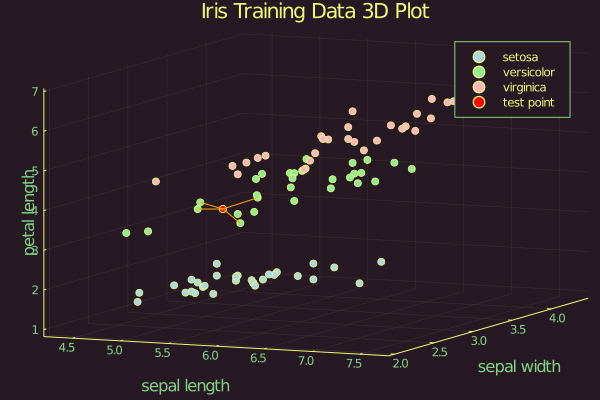

In [10]:
show_neighbors(70,x_data,y_data,4)

In [11]:
function predict(i, feature_array, label_array, k)
    point = test_point(i)
    KNN_array = KNN(point, feature_array, label_array, k)
    setosa_count    = sum([1 for x in KNN_array if x[2] == "setosa"    ])
    versicolor_count = sum([1 for x in KNN_array if x[2] == "versicolor"])
    virginica_count = sum([1 for x in KNN_array if x[2] == "virginica" ])
    
    count_array = [("setosa", setosa_count), ("versicolor", versicolor_count), ("virginica", virginica_count)]
    sort!(count_array, by = x -> x[2])
    
    return count_array[end][1]
end    

predict (generic function with 1 method)

In [12]:
predict(43, x_data, y_data, 4)

"setosa"

In [13]:
iris.Species[43]

CategoricalValue{String,UInt8} "setosa"

The last two lines show that KNN can be used to make classifications on data that it was not trained on

This was proven to be correct by classifying using the algorithm and then comparing the prediction to the known output

In [14]:
movies = CSV.read("Movies_recommendation_data.csv")

,MovieID,MovieName,IMDBRating,Biography,Drama,Thriller
,Int64,String,Float64,Int64,Int64,Int64
1,58,The Imitation Game,8.0,1,1,1
2,8,Ex Machina,7.7,0,1,0
3,46,A Beautiful Mind,8.2,1,1,0
4,62,Good Will Hunting,8.3,0,1,0
5,97,Forrest Gump,8.8,0,1,0
6,98,21,6.8,0,1,0
7,31,Gifted,7.6,0,1,0
8,3,Travelling Salesman,5.9,0,1,0
9,51,Avatar,7.9,0,0,0


In [15]:
names(movies)

11-element Array{String,1}:
 "MovieID"
 "MovieName"
 "IMDBRating"
 "Biography"
 "Drama"
 "Thriller"
 "Comedy"
 "Crime"
 "Mystery"
 "History"
 "Label"

In [16]:
x_movie_data = [x for x in zip(movies.Biography, movies.Drama, movies.Thriller, movies.Comedy,  movies.Crime,  movies.Mystery,  movies.History)]

30-element Array{NTuple{7,Int64},1}:
 (1, 1, 1, 0, 0, 0, 0)
 (0, 1, 0, 0, 0, 1, 0)
 (1, 1, 0, 0, 0, 0, 0)
 (0, 1, 0, 0, 0, 0, 0)
 (0, 1, 0, 0, 0, 0, 0)
 (0, 1, 0, 0, 1, 0, 1)
 (0, 1, 0, 0, 0, 0, 0)
 (0, 1, 0, 0, 0, 1, 0)
 (0, 0, 0, 0, 0, 0, 0)
 (0, 1, 0, 0, 0, 0, 0)
 (0, 1, 0, 0, 0, 0, 0)
 (0, 1, 1, 0, 1, 0, 0)
 (0, 1, 0, 0, 0, 0, 0)
 ⋮
 (0, 1, 0, 0, 0, 0, 0)
 (0, 0, 0, 0, 0, 0, 0)
 (0, 0, 1, 0, 0, 1, 0)
 (0, 1, 0, 0, 0, 0, 0)
 (0, 0, 0, 0, 0, 0, 0)
 (0, 0, 0, 1, 1, 0, 0)
 (0, 0, 0, 0, 0, 0, 0)
 (0, 0, 0, 1, 0, 0, 0)
 (0, 0, 0, 0, 0, 0, 0)
 (1, 1, 0, 0, 0, 0, 1)
 (1, 1, 0, 0, 0, 0, 1)
 (1, 1, 0, 0, 0, 0, 0)

In [17]:
y_movie_data = [x for x in movies.MovieName]

30-element Array{String,1}:
 "The Imitation Game"
 "Ex Machina"
 "A Beautiful Mind"
 "Good Will Hunting"
 "Forrest Gump"
 "21"
 "Gifted"
 "Travelling Salesman"
 "Avatar"
 "The Karate Kid"
 "A Brilliant Young Mind"
 "A Time To Kill"
 "Interstellar"
 ⋮
 "Finding Forrester"
 "The Fountain"
 "The DaVinci Code"
 "Stand and Deliver"
 "The Terminator"
 "21 Jump Street"
 "The Avengers"
 "Thor: Ragnarok"
 "Spirit: Stallion of the Cimarron"
 "Hacksaw Ridge"
 "12 Years a Slave"
 "Queen of Katwe"

In [18]:
# if a distance can be calcuated, the neighbors can be calculated
distance(x_movie_data[1], x_movie_data[2])

1.7320508075688772

Create a function that will print the titles of movies that are the k nearest to the target movie
use this function then to find the 10 closest movies to the Terminator

![terminator](terminator.jpg)

In [19]:
function more_like_this(movie_name, feature_array, label_array, k)
    #neighbor_array = KNN(label_array)
    println("These are the top $k similar movies:")
    println("____________________________________")
    for i = 1:length(feature_array)
        if label_array[i] == movie_name
            neighbor_array = KNN(feature_array[i], feature_array, label_array, k)
            for j = 1:length(neighbor_array)
                println("$j. ", neighbor_array[j][2])
            end
        end
    end
end           

more_like_this (generic function with 1 method)

In [20]:
more_like_this("The Terminator", x_movie_data, y_movie_data, 10)

These are the top 10 similar movies:
____________________________________
1. Good Will Hunting
2. Forrest Gump
3. Gifted
4. The Karate Kid
5. A Brilliant Young Mind
6. Interstellar
7. Finding Forrester
8. Stand and Deliver
9. Thor: Ragnarok
10. Ex Machina


The results of the KNN Recommendation system is to watch the 10 movies closest to The Terminator based on the features used in the K Nearest Neighbors algorithm